# Applying SAIPy: loading data - single station

This notebook demonstrates the use of the package for magnitude estimation, phase arrival-time localization and polarity estimation, and saving the result as a csv file.
* Updated in May 2025.

In [1]:
import os
import torch
from obspy import UTCDateTime, read
from saipy.data.realdata import load_streams, preprocessing
from saipy.utils.packagetools import *
from saipy.utils.visualizations import plot_data

2025-08-19 14:09:08.260106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%reload_ext autoreload
%autoreload 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## $(\mathrm{i})$ Path to the Models

In [3]:
dirmodel = '../saipy/saved_models/'

## $(\mathrm{ii})$ Monitoring continuous data. Last Version v2 (monitor function).

In [4]:
# Time format for titles
start_time = UTCDateTime("2023-02-06T02:20:00")
starttime_str = start_time.strftime("%Y-%m-%d %H:%M:%S")
day = start_time.strftime("%Y%m%d")
stime = start_time.strftime("%H%M%S")

In [5]:
station = 'CEYT1'
format = ".mseed"  # File extension

In [6]:
# Path to be defined by users
dirwork = '../' 
dirdata = os.path.join(dirwork,'Data_examples/Data_Turkey/')

In [7]:
print(f"\n** Reading data: station {station}, date {starttime_str}... **")
filename = f"{station}{format}"
data_path = os.path.join(dirdata,filename)
stream = read(data_path)
print(stream)


** Reading data: station CEYT1, date 2023-02-06 02:20:00... **
3 Trace(s) in Stream:
KO.CEYT..HHE | 2023-02-06T02:20:00.000000Z - 2023-02-06T03:00:00.000000Z | 100.0 Hz, 240001 samples
KO.CEYT..HHN | 2023-02-06T02:20:00.000000Z - 2023-02-06T03:00:00.000000Z | 100.0 Hz, 240001 samples
KO.CEYT..HHZ | 2023-02-06T02:20:00.000000Z - 2023-02-06T03:00:00.000000Z | 100.0 Hz, 240001 samples


In [8]:
# Filter bp 1-45 Hz and resampling (100 Hz, if necessary)
print("** Preprocessing data... **")
prepro_stream, prepro_wave_array = preprocessing(stream)
print(prepro_stream)

** Preprocessing data... **
3 Trace(s) in Stream:
KO.CEYT..HHE | 2023-02-06T02:20:00.000000Z - 2023-02-06T03:00:00.000000Z | 100.0 Hz, 240001 samples
KO.CEYT..HHN | 2023-02-06T02:20:00.000000Z - 2023-02-06T03:00:00.000000Z | 100.0 Hz, 240001 samples
KO.CEYT..HHZ | 2023-02-06T02:20:00.000000Z - 2023-02-06T03:00:00.000000Z | 100.0 Hz, 240001 samples


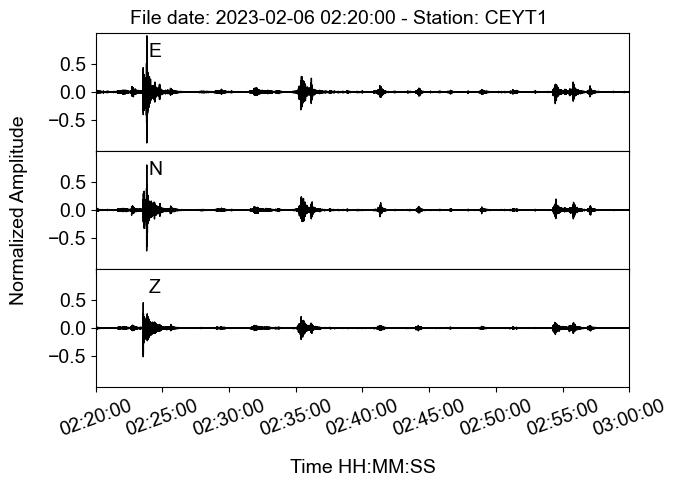

In [9]:
# Visualization
plot_range = np.arange(0, len(prepro_wave_array))
time_utc = start_time.datetime
fig = plot_data(prepro_wave_array, station, time_utc, starttime_str, samples=plot_range)


** Monitoring data... **
Earthquake scan time window: 60 seconds
Stepsize for detection: 10 samples
Earthquake detected with 5 consecutive positive detections
Stepsize for picking: 10 samples

1) Running Creime_rt for event detection and magnitude


/Volumes/GUAN_YIN/SAIPy_Network_Paper/SAIPy_network/venv_saipy/lib/python3.8/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


94/94 [==============================] - 363s 4s/step
Time elapsed: 371.66 seconds
Number of detected earthquake windows: 1887

___________________________________________

Detected event window indices: [824, 825, 826, 833, 836]
Continuity check result: False
No events detected till 2023-02-06T02:21:22.300000Z

___________________________________________

Detected event window indices: [833, 836, 837, 904, 906]
Continuity check result: False
No events detected till 2023-02-06T02:21:22.600000Z

___________________________________________

Detected event window indices: [836, 837, 904, 906, 908]
Continuity check result: False
No events detected till 2023-02-06T02:21:29.400000Z

___________________________________________

Detected event window indices: [904, 906, 908, 909, 913]
Continuity check result: False
No events detected till 2023-02-06T02:21:29.600000Z

___________________________________________

Detected event window indices: [906, 908, 909, 913, 914]
Continuity check result: F

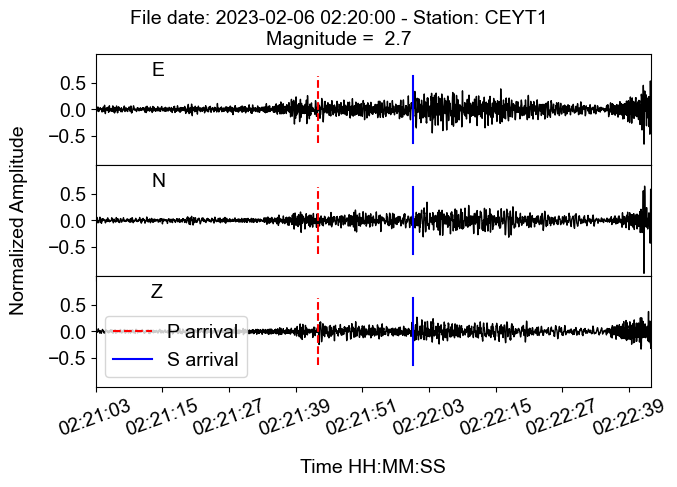

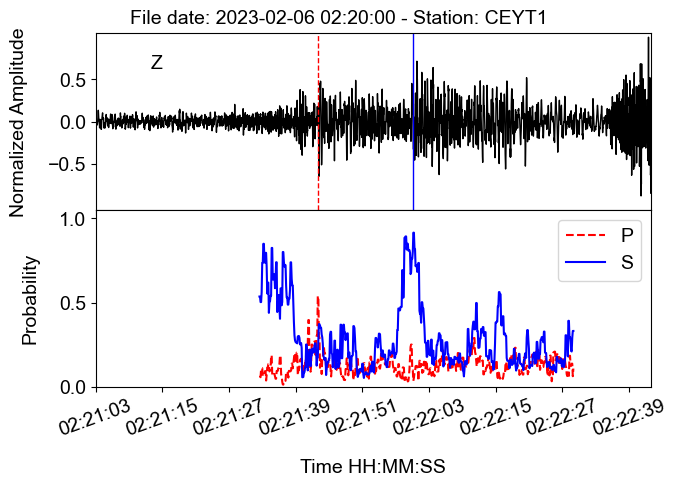

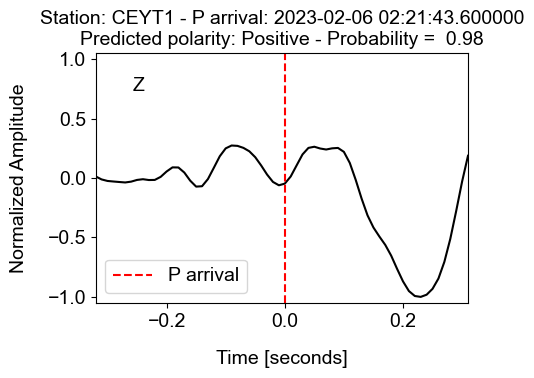


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [1516, 1517, 1518, 1519, 1520]
Continuity check result: True

____________ Event: 2 _____________

2) Running DynaPicker for phase picking
Time elapsed: 46.98 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 261ms/step
Time elapsed: 0.75 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:22:35.300000Z
S-arrival: 2023-02-06T02:22:41.800000Z
Magnitude: 3.5999999046325684
Polarity: Negative (Probability: 0.904)


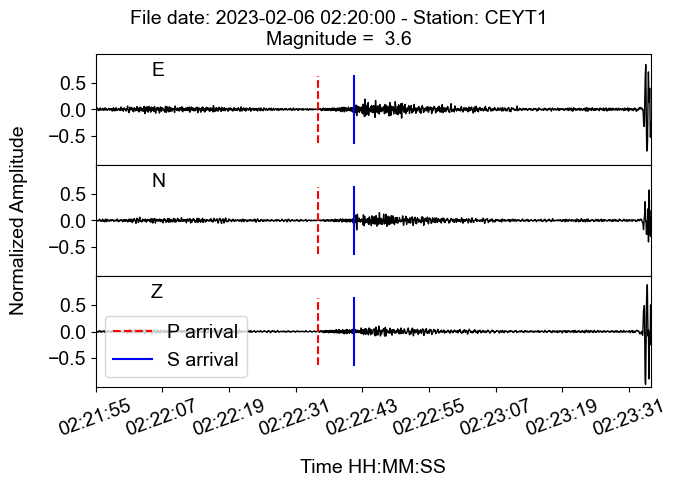

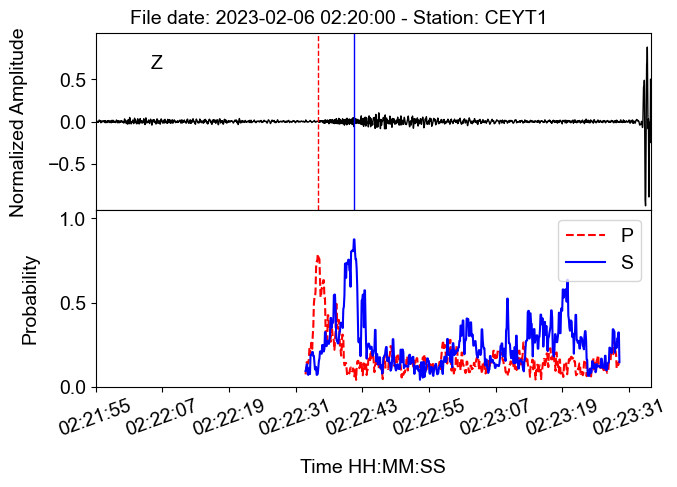

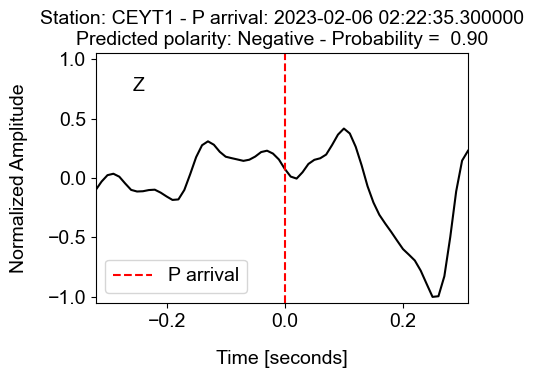


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [2116, 2117, 2118, 2119, 2120]
Continuity check result: True

____________ Event: 3 _____________

2) Running DynaPicker for phase picking
Time elapsed: 138.85 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 1s 511ms/step
Time elapsed: 1.65 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:23:33.700000Z
S-arrival: 2023-02-06T02:23:47.300000Z
Magnitude: 5.300000190734863
Polarity: Negative (Probability: 0.702)


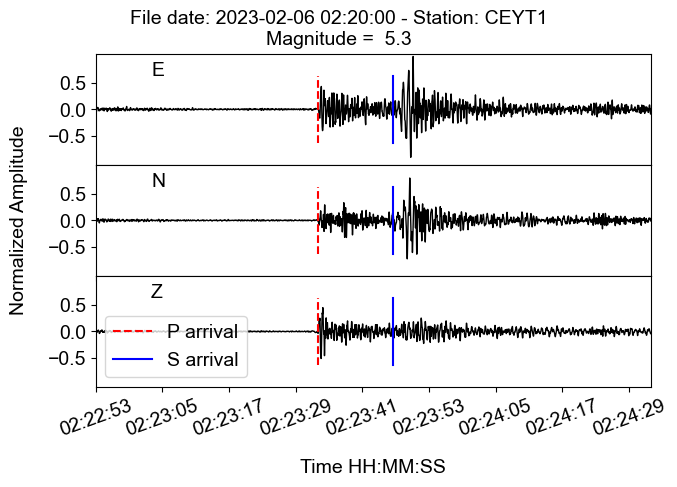

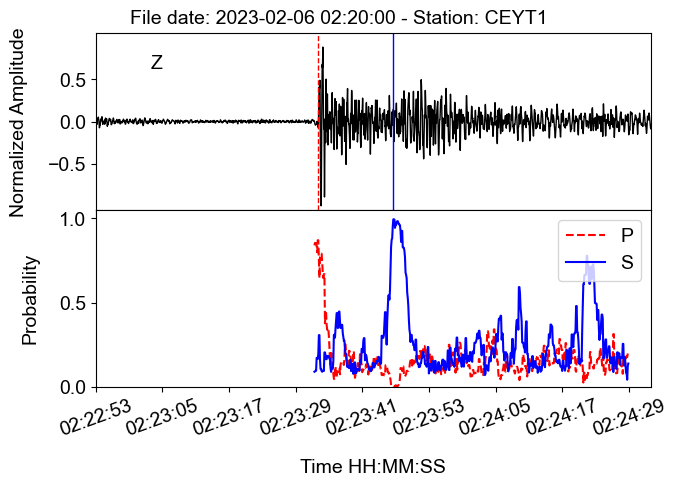

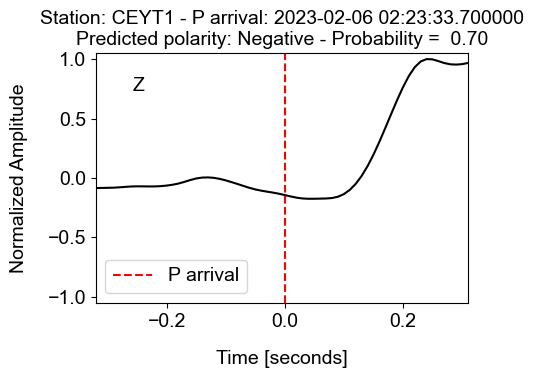


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [2799, 2802, 2808, 2813, 3277]
Continuity check result: False
No events detected till 2023-02-06T02:24:39.200000Z

___________________________________________

Detected event window indices: [2802, 2808, 2813, 3277, 3282]
Continuity check result: False
No events detected till 2023-02-06T02:24:39.800000Z

___________________________________________

Detected event window indices: [2808, 2813, 3277, 3282, 3284]
Continuity check result: False
No events detected till 2023-02-06T02:24:40.300000Z

___________________________________________

Detected event window indices: [2813, 3277, 3282, 3284, 3285]
Continuity check result: False
No events detected till 2023-02-06T02:25:26.700000Z

___________________________________________

Detected event window

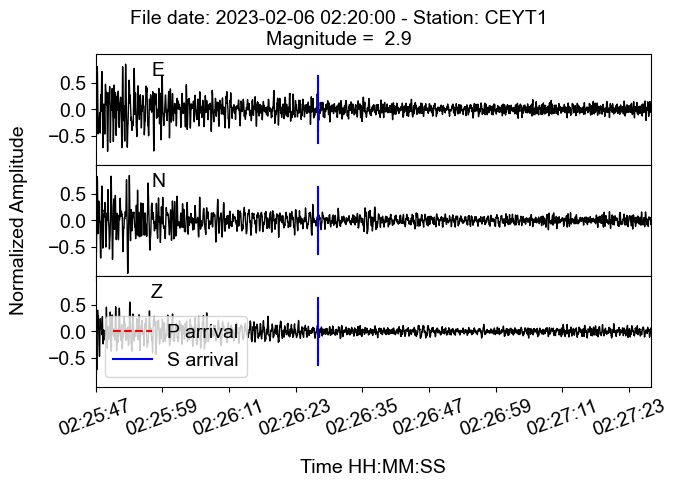

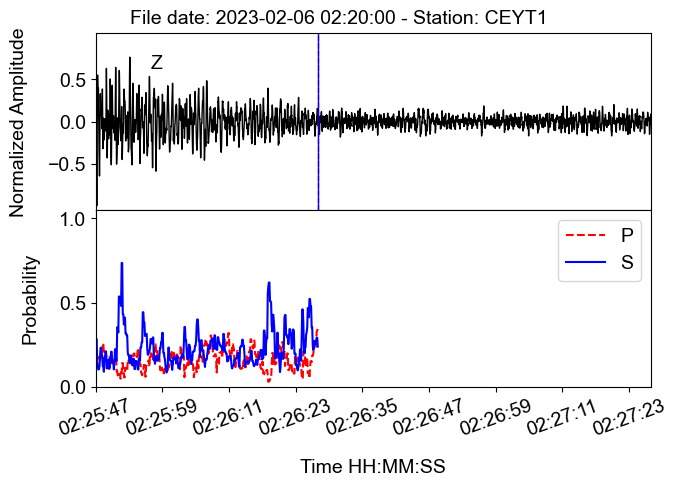

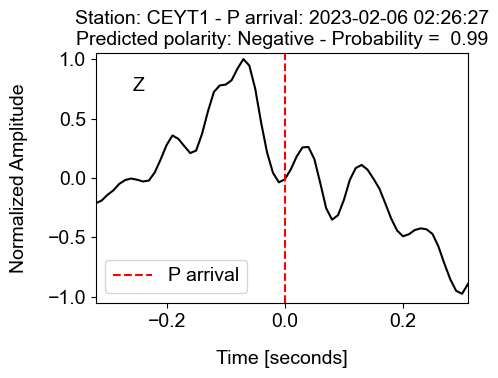


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [4641, 4642, 4657, 6721, 6722]
Continuity check result: False
No events detected till 2023-02-06T02:27:44.700000Z

___________________________________________

Detected event window indices: [4657, 6721, 6722, 6723, 6724]
Continuity check result: False
No events detected till 2023-02-06T02:31:11.100000Z

___________________________________________

Detected event window indices: [6721, 6722, 6723, 6724, 6725]
Continuity check result: True

____________ Event: 5 _____________

2) Running DynaPicker for phase picking
Time elapsed: 79.55 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 1s 765ms/step
Time elapsed: 1.55 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:31:21.400000Z
S-arrival: 2023-02-06

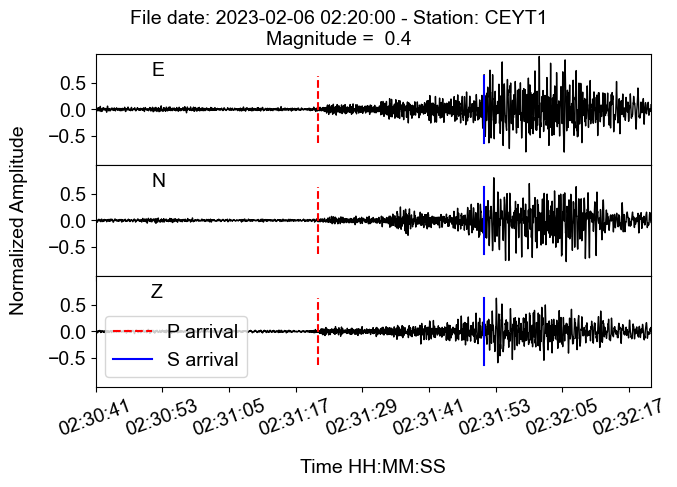

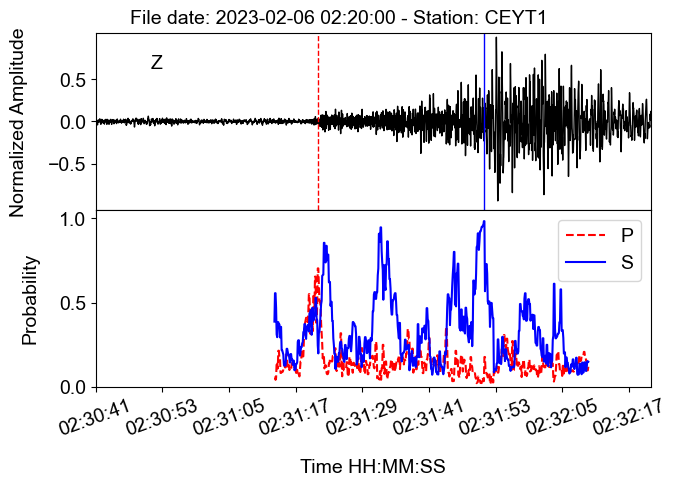

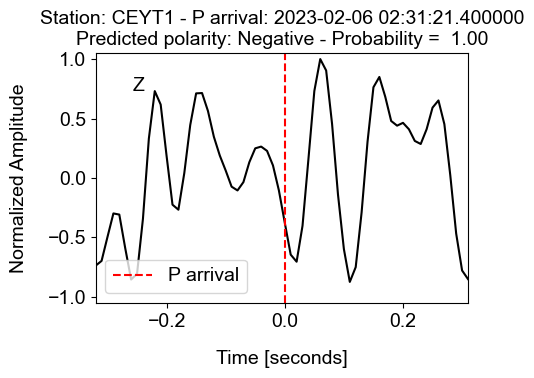


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [7973, 7984, 7986, 7987, 7988]
Continuity check result: False
No events detected till 2023-02-06T02:33:17.400000Z

___________________________________________

Detected event window indices: [7984, 7986, 7987, 7988, 7989]
Continuity check result: False
No events detected till 2023-02-06T02:33:17.600000Z

___________________________________________

Detected event window indices: [7986, 7987, 7988, 7989, 7990]
Continuity check result: True

____________ Event: 6 _____________

2) Running DynaPicker for phase picking
Time elapsed: 50.37 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 206ms/step
Time elapsed: 0.60 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:33:23.000000Z
S-arrival: 2023-02-06

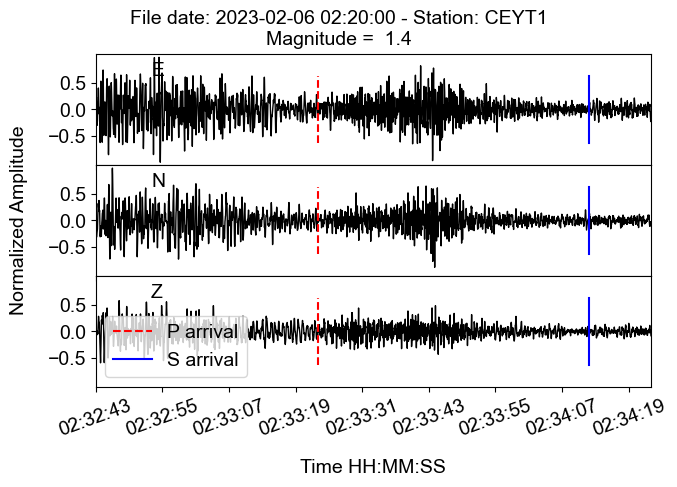

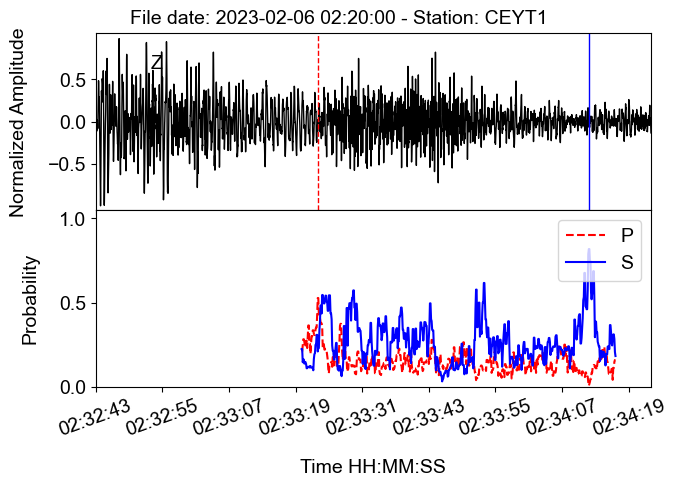

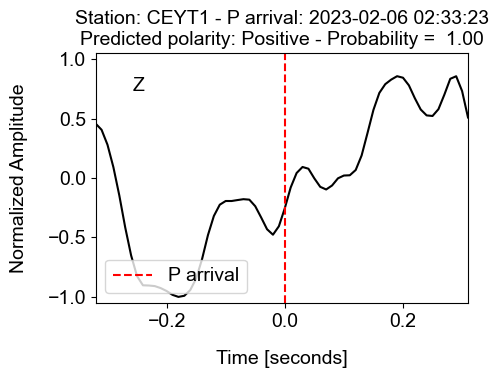


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [8745, 8746, 8748, 8749, 8750]
Continuity check result: False
No events detected till 2023-02-06T02:34:33.800000Z

___________________________________________

Detected event window indices: [8748, 8749, 8750, 8751, 8752]
Continuity check result: True

____________ Event: 7 _____________

2) Running DynaPicker for phase picking
Time elapsed: 43.99 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 204ms/step
Time elapsed: 0.60 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:35:10.700000Z
S-arrival: 2023-02-06T02:35:21.100000Z
Magnitude: 3.200000047683716
Polarity: Negative (Probability: 0.959)


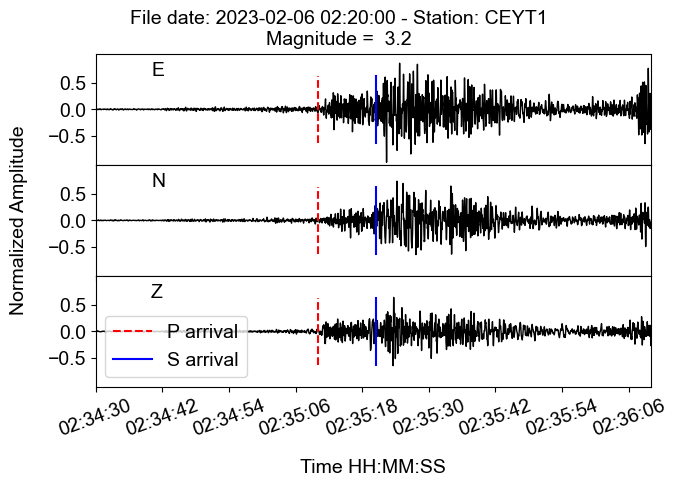

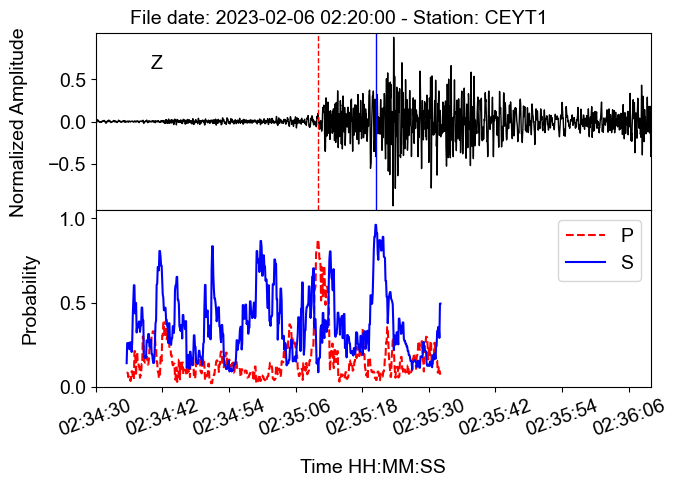

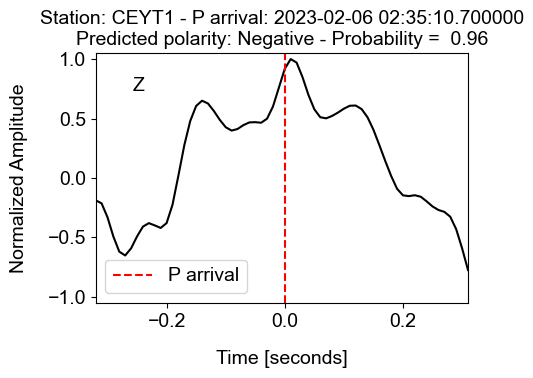


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [9509, 9511, 9512, 9513, 9514]
Continuity check result: False
No events detected till 2023-02-06T02:35:50.100000Z

___________________________________________

Detected event window indices: [9511, 9512, 9513, 9514, 9515]
Continuity check result: True

____________ Event: 8 _____________

2) Running DynaPicker for phase picking
Time elapsed: 49.32 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 254ms/step
Time elapsed: 0.70 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:35:57.900000Z
S-arrival: 2023-02-06T02:36:07.200000Z
Magnitude: 1.600000023841858
Polarity: Negative (Probability: 1.000)


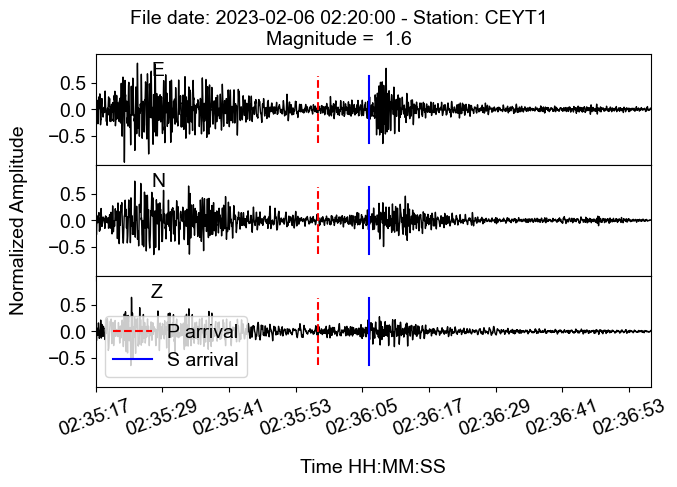

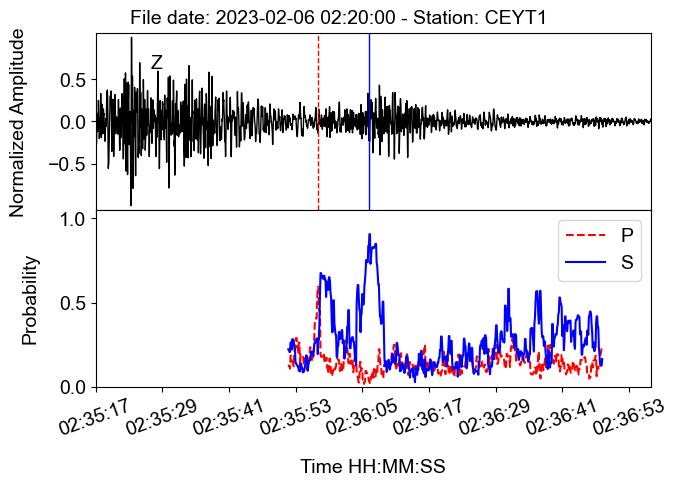

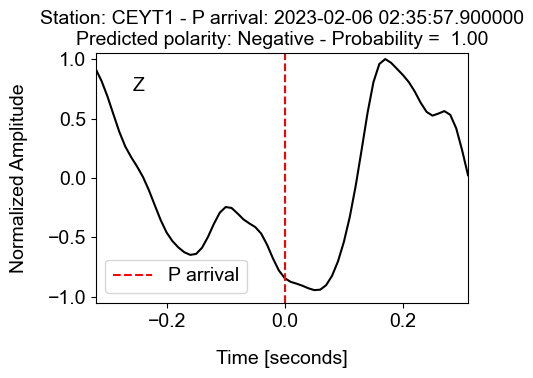


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [12238, 12240, 12241, 12242, 12243]
Continuity check result: False
No events detected till 2023-02-06T02:40:23.000000Z

___________________________________________

Detected event window indices: [12240, 12241, 12242, 12243, 12244]
Continuity check result: True

____________ Event: 9 _____________

2) Running DynaPicker for phase picking
Time elapsed: 55.24 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 257ms/step
Time elapsed: 0.74 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:40:32.400000Z
S-arrival: 2023-02-06T02:41:03.900000Z
Magnitude: 2.9000000953674316
Polarity: Negative (Probability: 0.998)


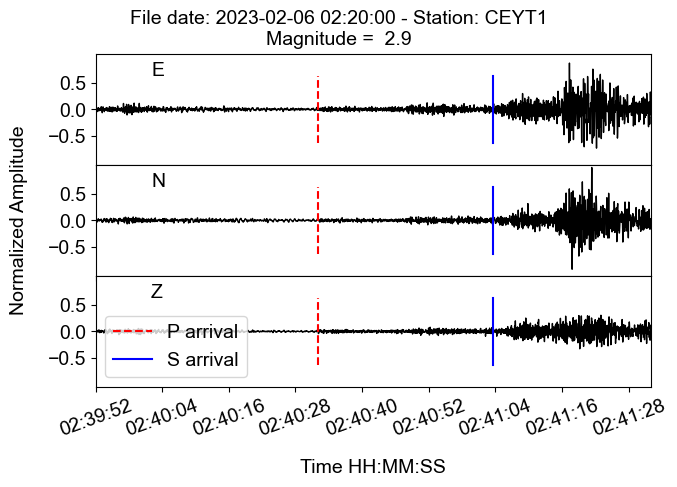

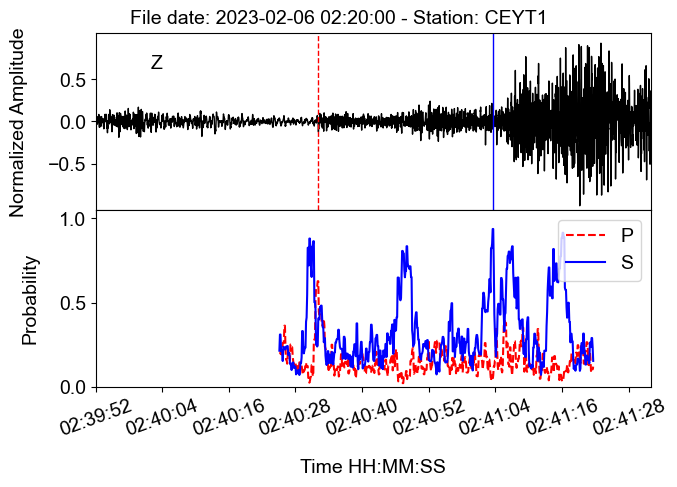

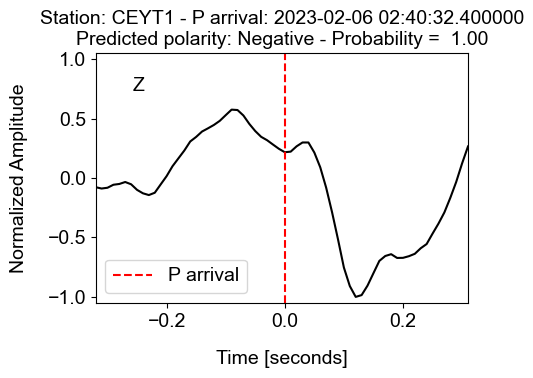


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [13234, 13238, 13240, 13242, 13243]
Continuity check result: False
No events detected till 2023-02-06T02:42:02.800000Z

___________________________________________

Detected event window indices: [13238, 13240, 13242, 13243, 13244]
Continuity check result: False
No events detected till 2023-02-06T02:42:03.000000Z

___________________________________________

Detected event window indices: [13240, 13242, 13243, 13244, 13245]
Continuity check result: False
No events detected till 2023-02-06T02:42:03.200000Z

___________________________________________

Detected event window indices: [13242, 13243, 13244, 13245, 13249]
Continuity check result: False
No events detected till 2023-02-06T02:42:03.900000Z

___________________________________________

D

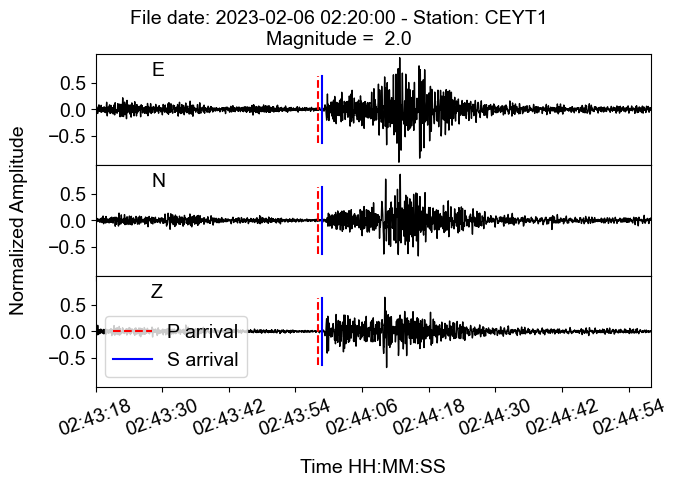

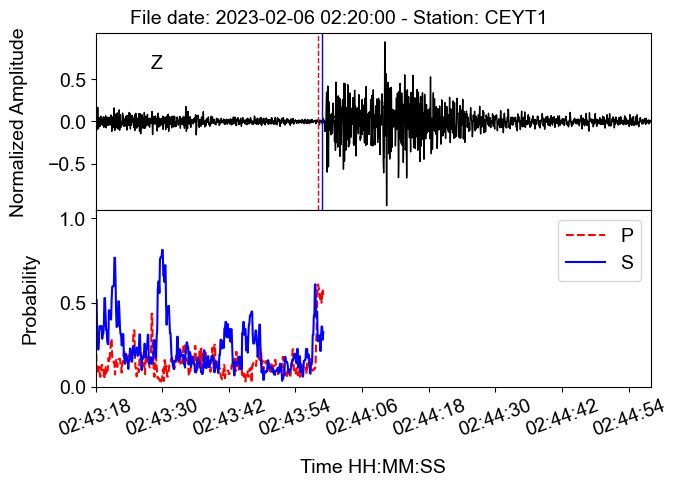

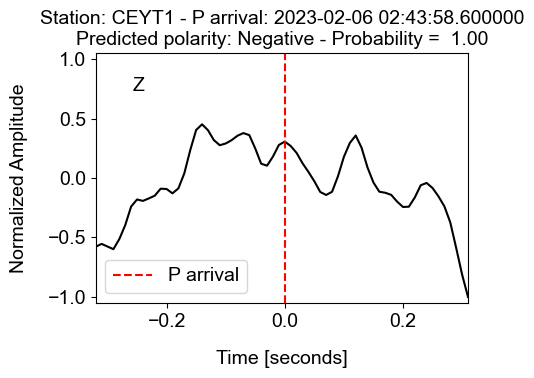


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [15231, 15237, 15238, 15239, 15240]
Continuity check result: False
No events detected till 2023-02-06T02:45:22.700000Z

___________________________________________

Detected event window indices: [15237, 15238, 15239, 15240, 15241]
Continuity check result: True

____________ Event: 11 _____________

2) Running DynaPicker for phase picking
Time elapsed: 69.78 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 246ms/step
Time elapsed: 0.74 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:45:31.600000Z
S-arrival: 2023-02-06T02:46:21.000000Z
Magnitude: 0.699999988079071
Polarity: Negative (Probability: 1.000)


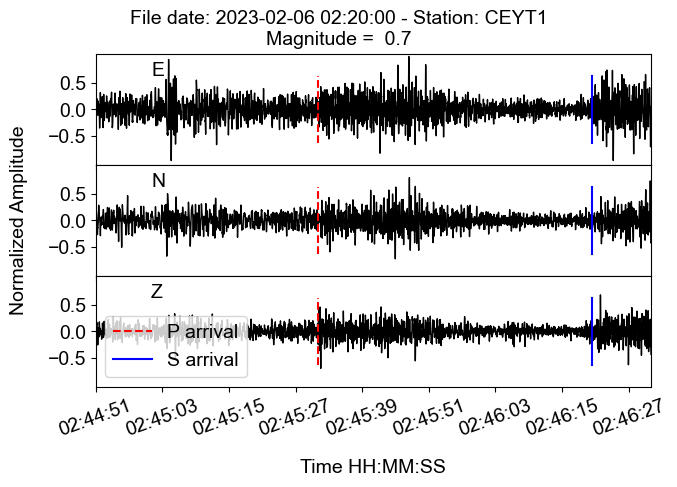

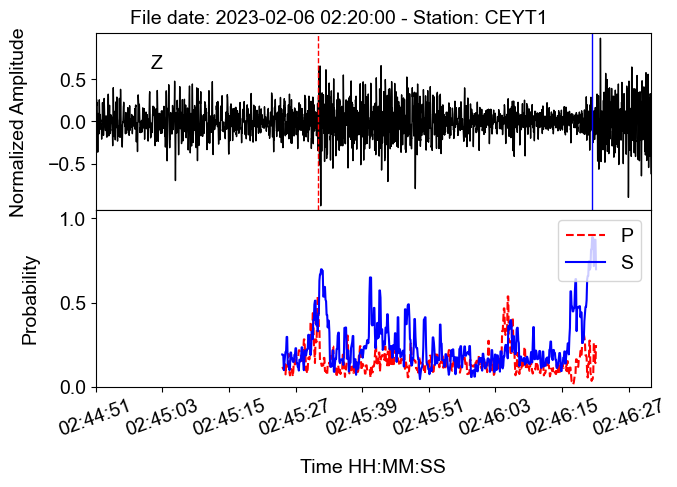

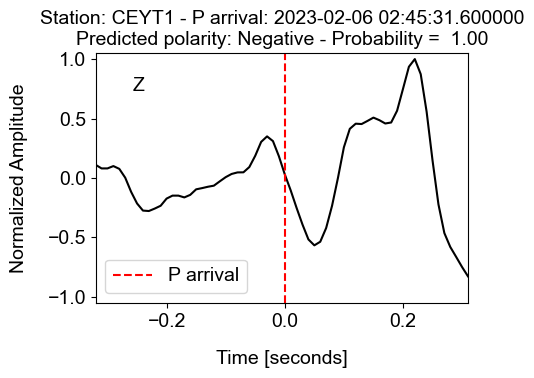


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [16521, 16532, 16540, 16542, 16544]
Continuity check result: False
No events detected till 2023-02-06T02:47:32.200000Z

___________________________________________

Detected event window indices: [16532, 16540, 16542, 16544, 16545]
Continuity check result: False
No events detected till 2023-02-06T02:47:33.000000Z

___________________________________________

Detected event window indices: [16540, 16542, 16544, 16545, 16562]
Continuity check result: False
No events detected till 2023-02-06T02:47:33.200000Z

___________________________________________

Detected event window indices: [16542, 16544, 16545, 16562, 16568]
Continuity check result: False
No events detected till 2023-02-06T02:47:33.400000Z

___________________________________________

D

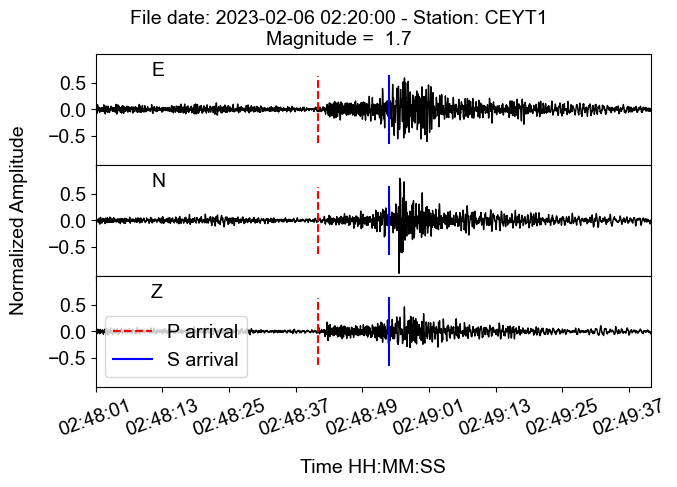

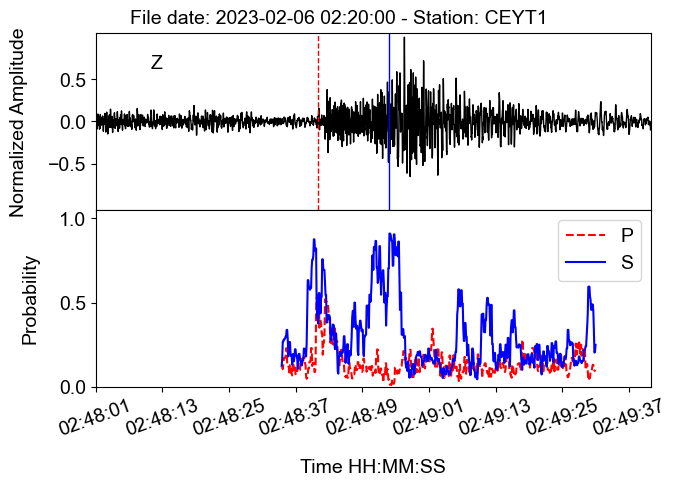

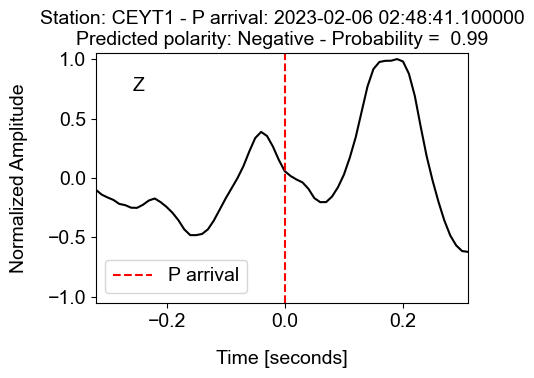


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [18522, 18523, 18524, 18525, 18526]
Continuity check result: True

____________ Event: 13 _____________

2) Running DynaPicker for phase picking
Time elapsed: 70.07 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 279ms/step
Time elapsed: 0.76 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:51:00.700000Z
S-arrival: 2023-02-06T02:51:14.300000Z
Magnitude: 1.7999999523162842
Polarity: Negative (Probability: 0.999)


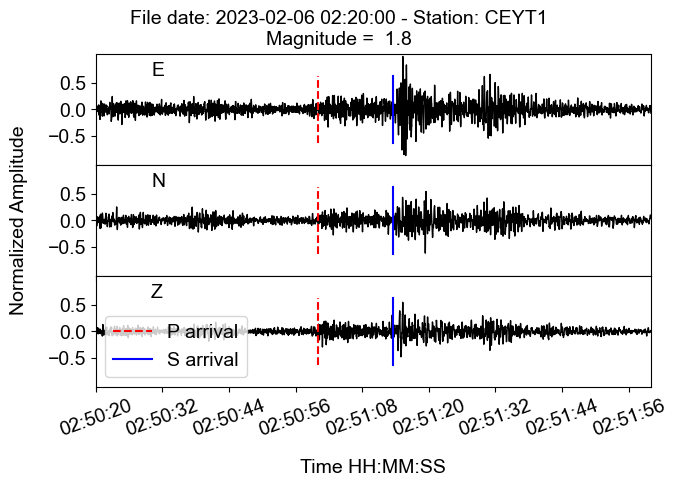

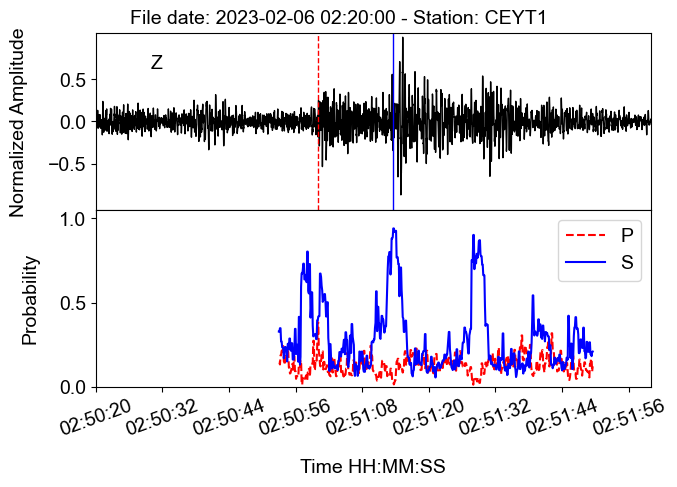

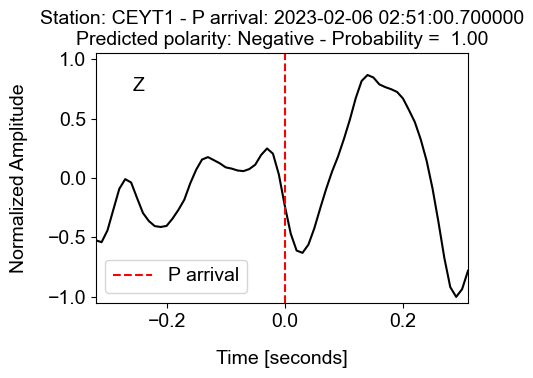


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [19534, 19536, 19538, 19545, 19546]
Continuity check result: False
No events detected till 2023-02-06T02:52:32.600000Z

___________________________________________

Detected event window indices: [19536, 19538, 19545, 19546, 19548]
Continuity check result: False
No events detected till 2023-02-06T02:52:32.800000Z

___________________________________________

Detected event window indices: [19538, 19545, 19546, 19548, 19554]
Continuity check result: False
No events detected till 2023-02-06T02:52:33.500000Z

___________________________________________

Detected event window indices: [19545, 19546, 19548, 19554, 19561]
Continuity check result: False
No events detected till 2023-02-06T02:52:33.800000Z

___________________________________________

D

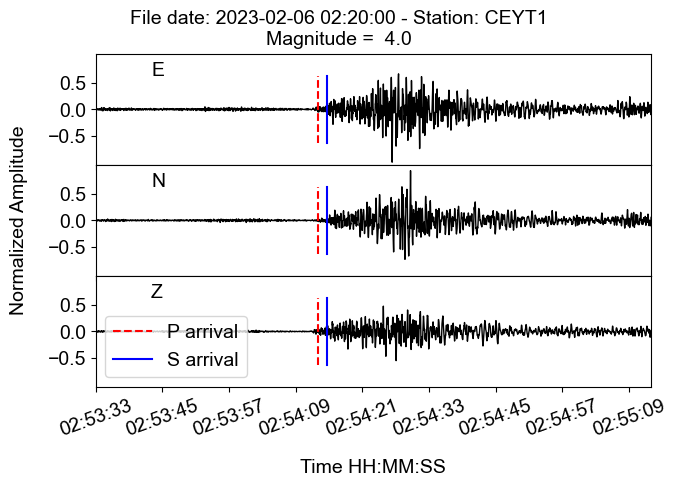

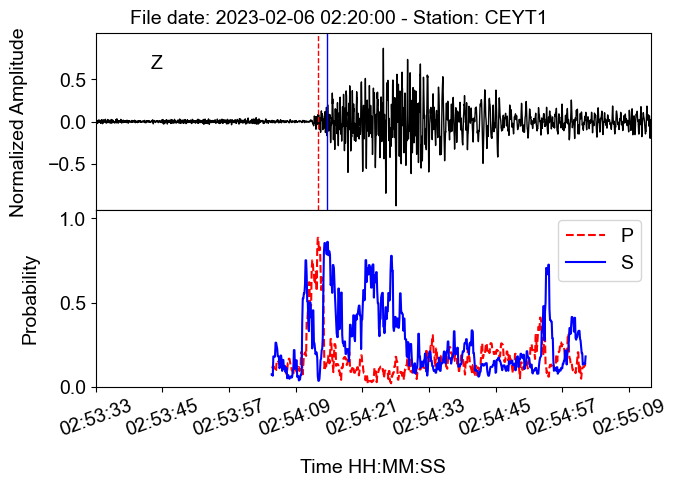

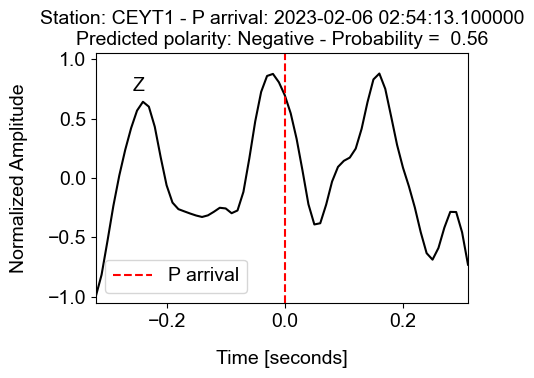


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [21200, 21201, 21202, 21203, 21204]
Continuity check result: True

____________ Event: 15 _____________

2) Running DynaPicker for phase picking
Time elapsed: 71.58 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 354ms/step
Time elapsed: 1.01 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:55:29.600000Z
S-arrival: 2023-02-06T02:55:44.900000Z
Magnitude: 3.9000000953674316
Polarity: Negative (Probability: 0.831)


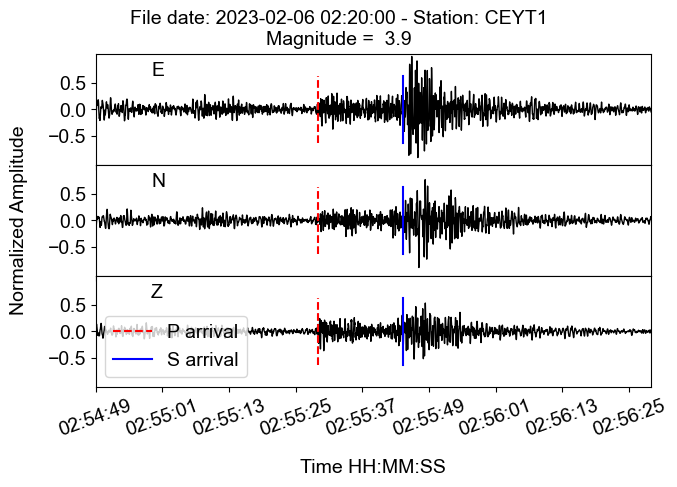

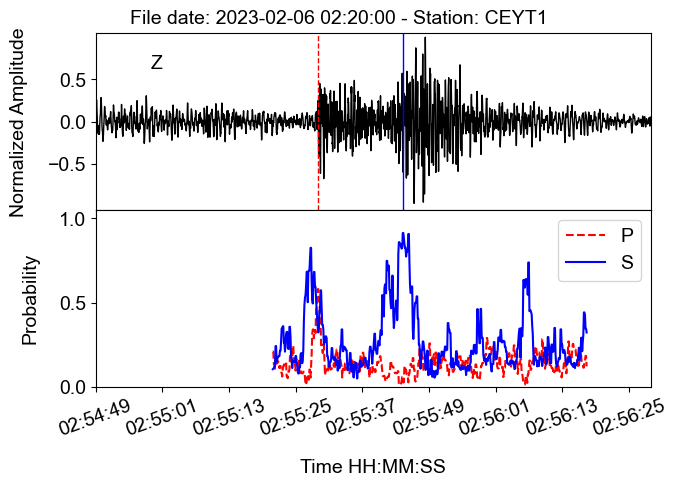

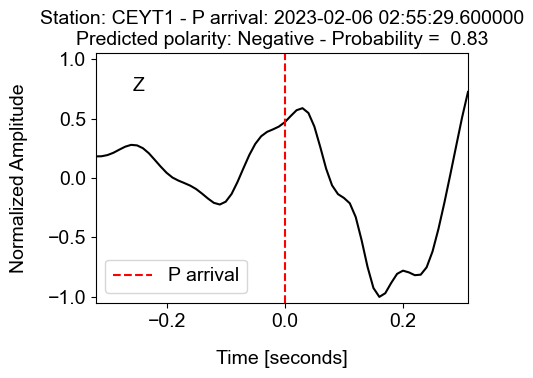


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [22007, 22008, 22009, 22010, 22011]
Continuity check result: True

____________ Event: 16 _____________

2) Running DynaPicker for phase picking
Time elapsed: 72.53 seconds

3) Running PolarCAP for polarity estimation
1/1 [==============================] - 0s 327ms/step
Time elapsed: 0.85 seconds

4) Results
Result:
P-arrival: 2023-02-06T02:56:49.100000Z
S-arrival: 2023-02-06T02:57:00.000000Z
Magnitude: 3.0
Polarity: Positive (Probability: 1.000)


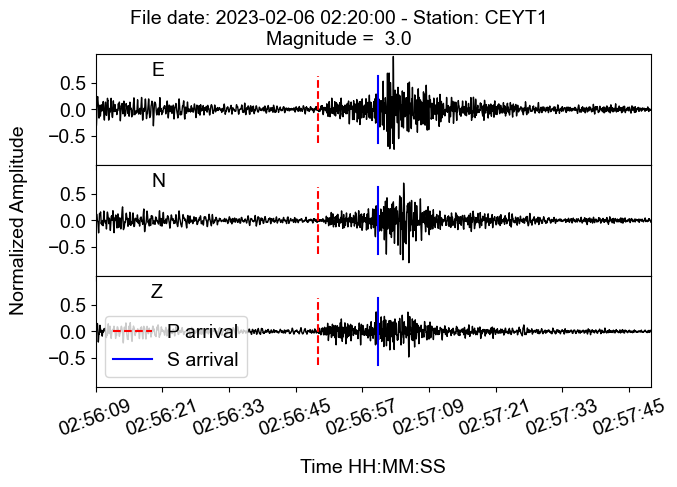

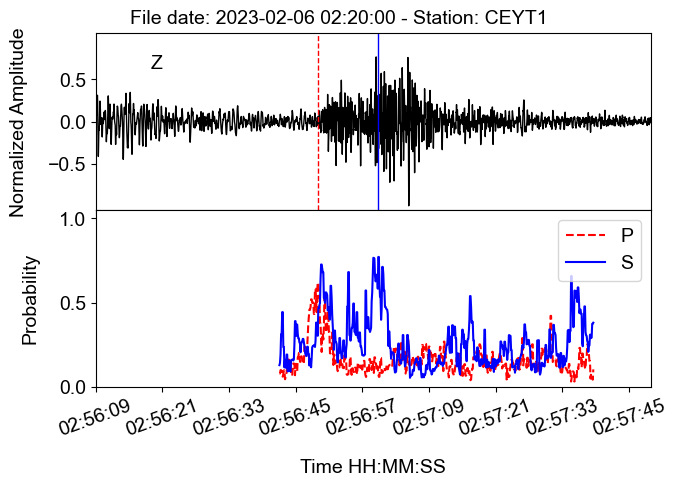

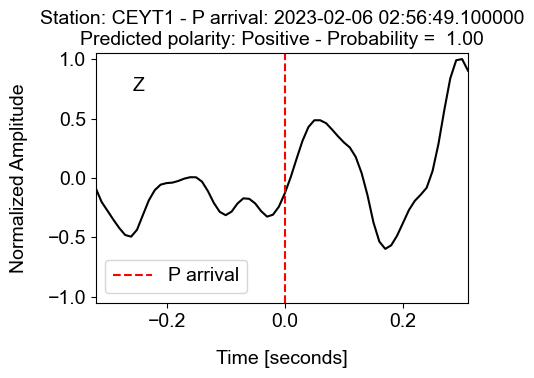


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000

___________________________________________

Detected event window indices: [23089, 23090, 23091, 23093, 23094]
Continuity check result: False
No events detected till 2023-02-06T02:58:28.300000Z

___________________________________________

Detected event window indices: [23093, 23094, 23097, 23099, 23101]
Continuity check result: False
No events detected till 2023-02-06T02:58:28.700000Z

___________________________________________

Detected event window indices: [23097, 23099, 23101, 23102, 23103]
Continuity check result: False
No events detected till 2023-02-06T02:58:28.900000Z

___________________________________________

Detected event window indices: [23099, 23101, 23102, 23103, 23104]
Continuity check result: False
No events detected till 2023-02-06T02:58:29.100000Z

___________________________________________

D

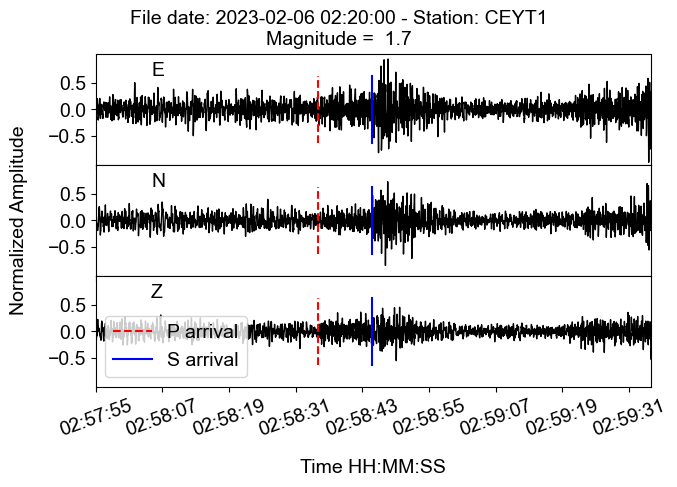

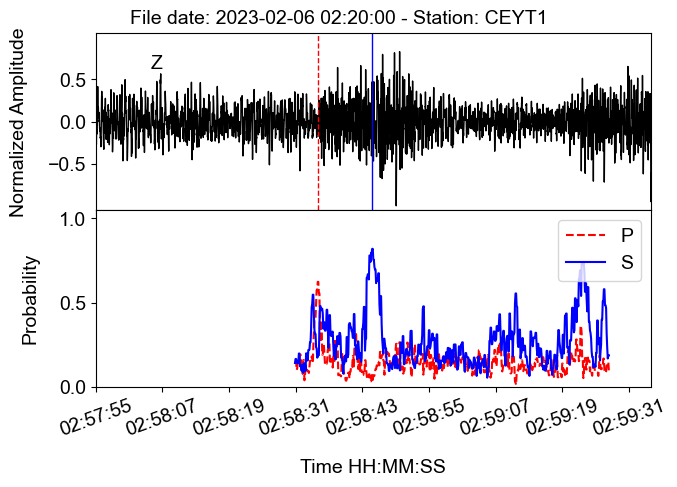

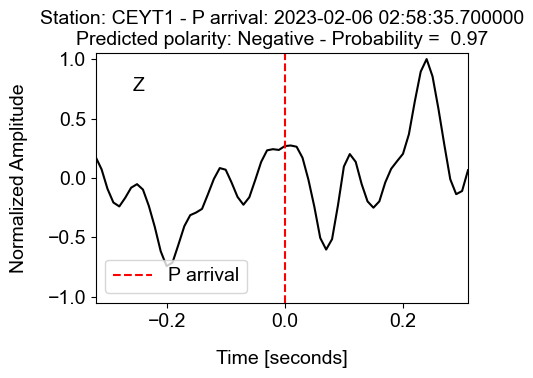


Saving results in ../results/results_CEYT1_v2/CEYT1/20230206_022000results_CEYT1_20230206_022000.csv

Saving plots in ../results/results_CEYT1_v2/CEYT1/20230206_022000
Analysis completed. No more events detected.
Total time elapsed: 1686.01 seconds


In [10]:
# Call ** monitor ** process
lw = 60
dw = 5
output_path = os.path.join(dirwork,'results/results_CEYT1_v2') # edit

results = monitor(prepro_stream, prepro_wave_array, device,
                                  station, day, stime,
                                  len_win=lw, detection_windows=dw,
                                  model_path=dirmodel,
                                  save_result=True,
                                  outpath=output_path)

## $(\mathrm{iii})$ Monitoring continuous data. Version v1 (monitor2 function).

/Volumes/GUAN_YIN/SAIPy_Network_Paper/SAIPy_network/venv_saipy/lib/python3.8/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


1/1 [==============================] - 0s 256ms/step
No (more) events detected till 2023-02-06T02:21:23.600000Z
No (more) events detected till 2023-02-06T02:21:30.600000Z
No (more) events detected till 2023-02-06T02:21:30.900000Z
No (more) events detected till 2023-02-06T02:21:31.400000Z
No (more) events detected till 2023-02-06T02:21:31.700000Z
1/1 [==============================] - 0s 318ms/step
Result:
P-arrival time = 2023-02-06T02:21:43.700000Z
S-arrival time = 2023-02-06T02:22:01.000000Z
Magnitude = 2.0999999046325684
Polarity = Negative (Probability = 1.000)


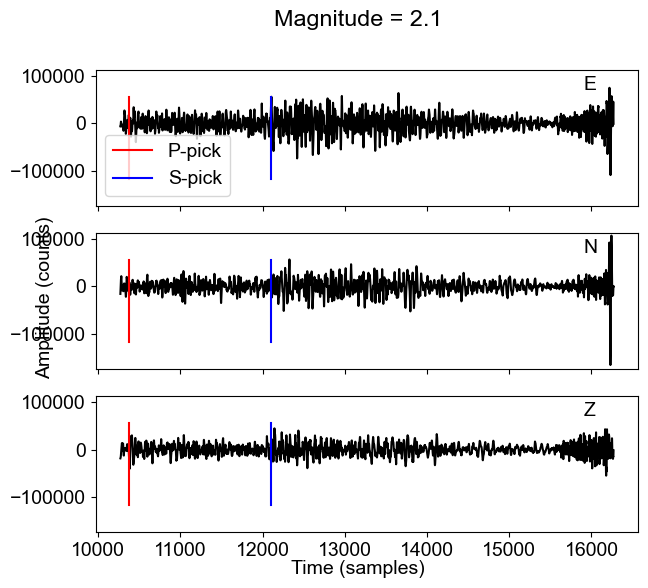

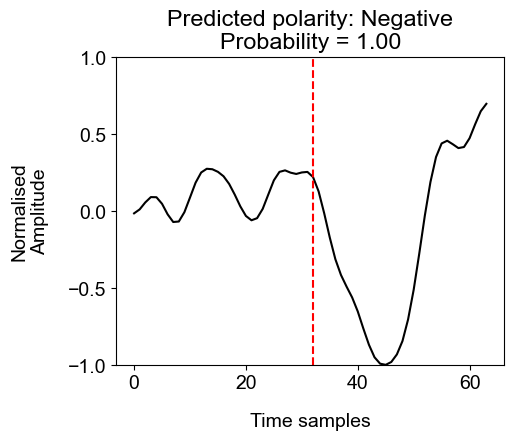

No (more) events detected till 2023-02-06T02:22:33.100000Z
1/1 [==============================] - 0s 205ms/step
Result:
P-arrival time = 2023-02-06T02:22:35.500000Z
S-arrival time = 2023-02-06T02:22:41.500000Z
Magnitude = 4.0
Polarity = Negative (Probability = 0.999)


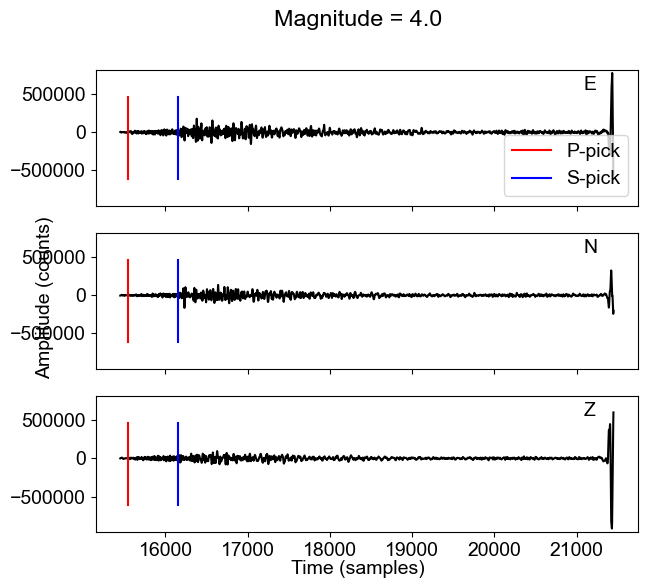

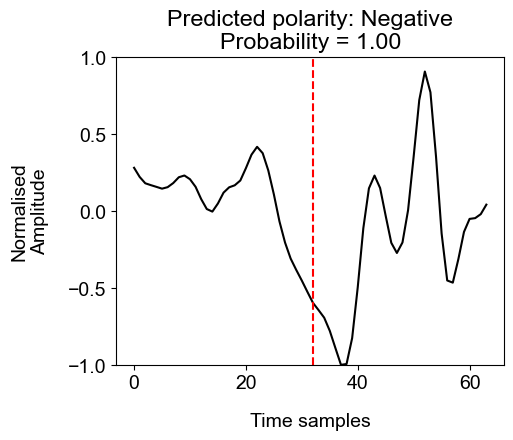

No (more) events detected till 2023-02-06T02:24:39.900000Z
No (more) events detected till 2023-02-06T02:24:40.800000Z
No (more) events detected till 2023-02-06T02:25:27.700000Z
No (more) events detected till 2023-02-06T02:25:28.400000Z
No (more) events detected till 2023-02-06T02:25:29.100000Z
1/1 [==============================] - 0s 219ms/step
Result:
P-arrival time = 2023-02-06T02:26:11.600000Z
S-arrival time = 2023-02-06T02:26:18.300000Z
Magnitude = 3.0999999046325684
Polarity = Negative (Probability = 0.848)


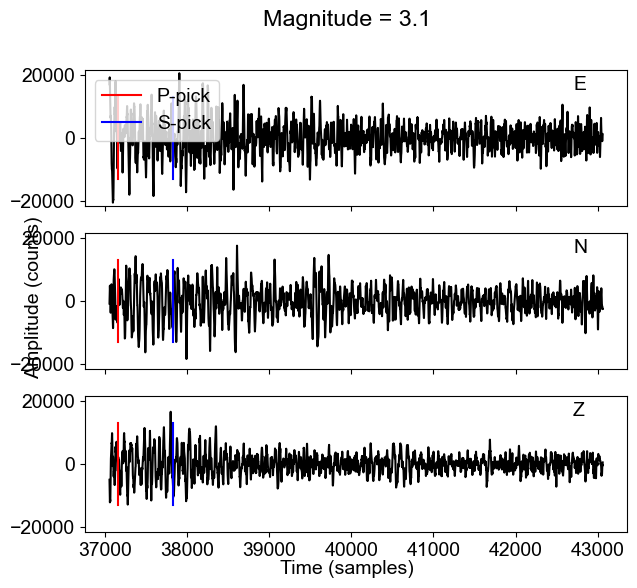

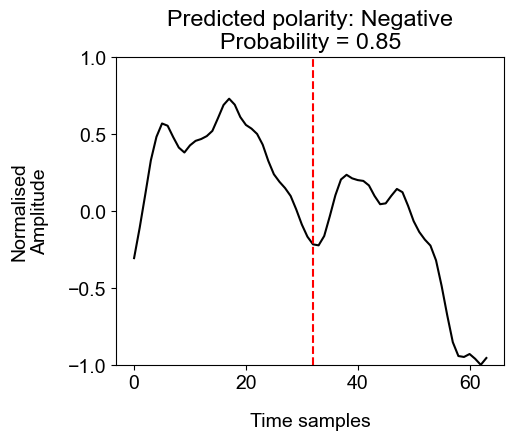

No (more) events detected till 2023-02-06T02:27:44.100000Z
No (more) events detected till 2023-02-06T02:31:12.100000Z
1/1 [==============================] - 0s 485ms/step
Result:
P-arrival time = 2023-02-06T02:31:21.400000Z
S-arrival time = 2023-02-06T02:31:51.200000Z
Magnitude = 0.4000000059604645
Polarity = Negative (Probability = 1.000)


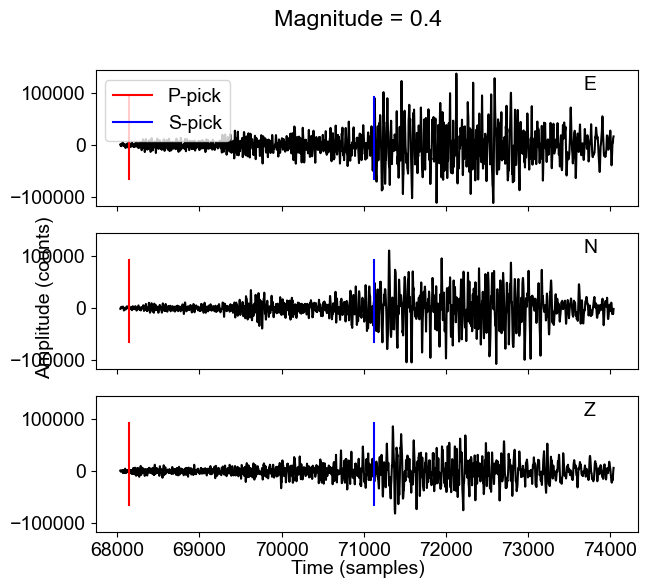

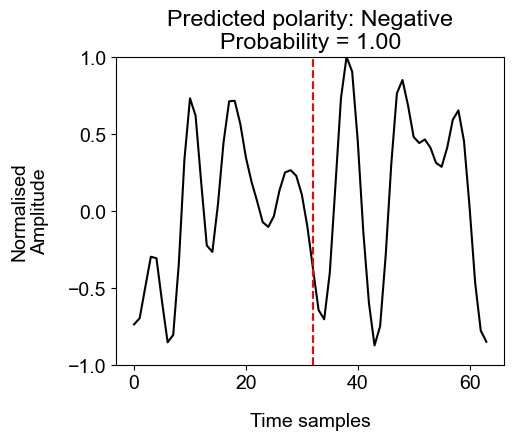

No (more) events detected till 2023-02-06T02:33:17.300000Z
No (more) events detected till 2023-02-06T02:33:18.600000Z
1/1 [==============================] - 0s 301ms/step
Result:
P-arrival time = 2023-02-06T02:33:22.400000Z
S-arrival time = 2023-02-06T02:33:24.700000Z
Magnitude = 1.399999976158142
Polarity = Positive (Probability = 1.000)


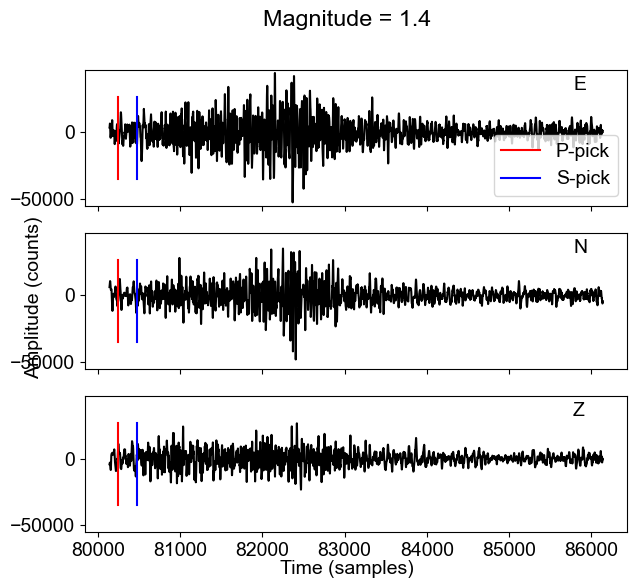

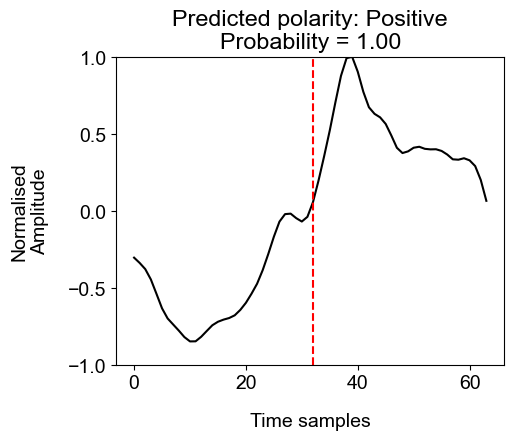

No (more) events detected till 2023-02-06T02:34:59.200000Z
No (more) events detected till 2023-02-06T02:35:01.900000Z
1/1 [==============================] - 0s 227ms/step
Result:
P-arrival time = 2023-02-06T02:35:10.500000Z
S-arrival time = 2023-02-06T02:35:21.200000Z
Magnitude = 4.5
Polarity = Positive (Probability = 1.000)


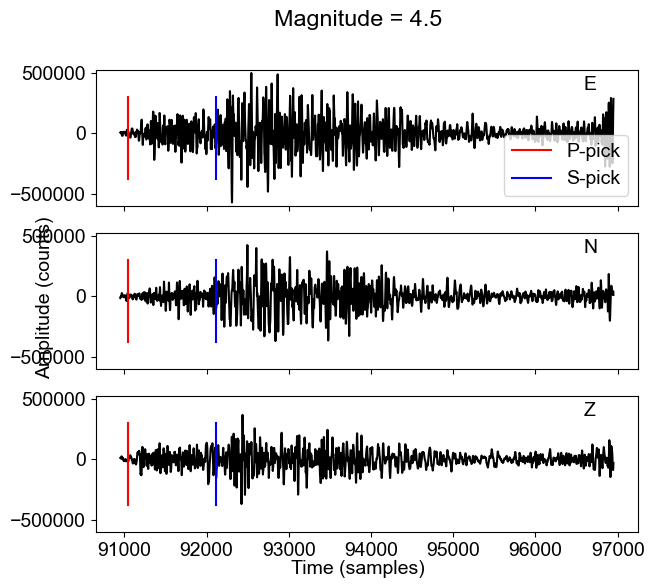

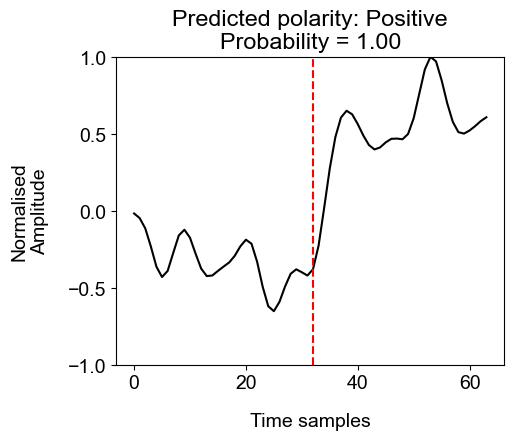

No (more) events detected till 2023-02-06T02:40:23.800000Z
No (more) events detected till 2023-02-06T02:40:24.100000Z
1/1 [==============================] - 0s 250ms/step
Result:
P-arrival time = 2023-02-06T02:41:06.200000Z
S-arrival time = 2023-02-06T02:41:16.700000Z
Magnitude = 3.0
Polarity = Positive (Probability = 0.924)


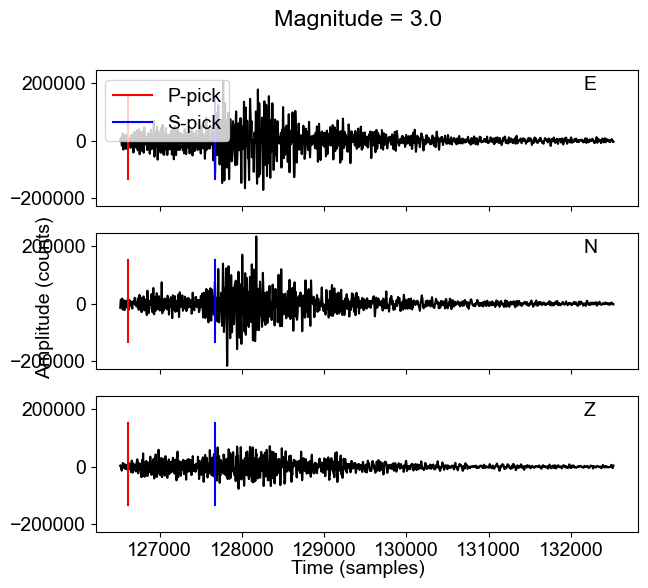

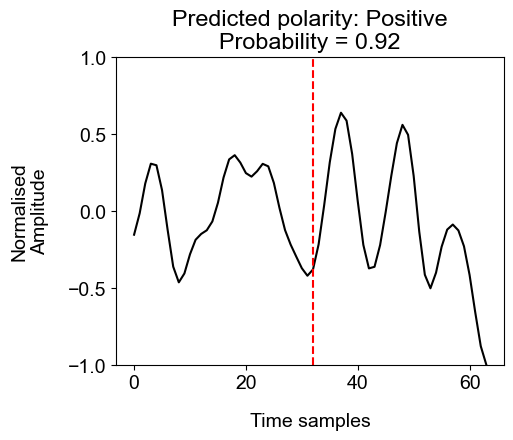

No (more) events detected till 2023-02-06T02:43:01.300000Z
No (more) events detected till 2023-02-06T02:43:01.700000Z
1/1 [==============================] - 0s 273ms/step
Result:
P-arrival time = 2023-02-06T02:43:59.600000Z
S-arrival time = 2023-02-06T02:43:59.700000Z
Magnitude = 2.200000047683716
Polarity = Negative (Probability = 1.000)


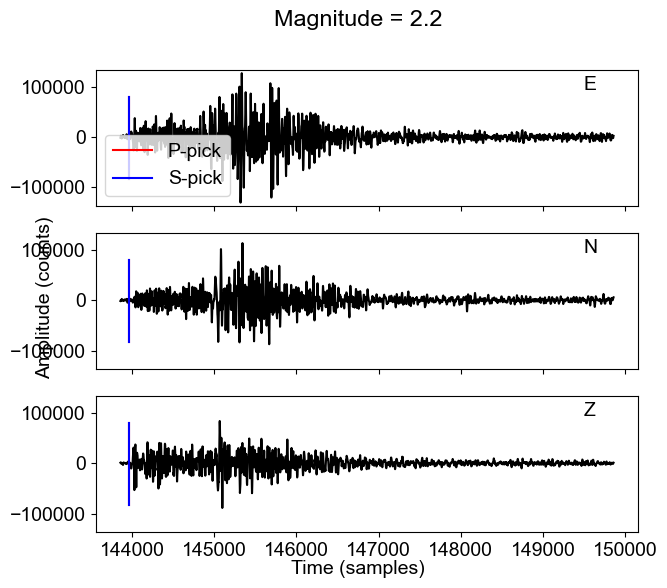

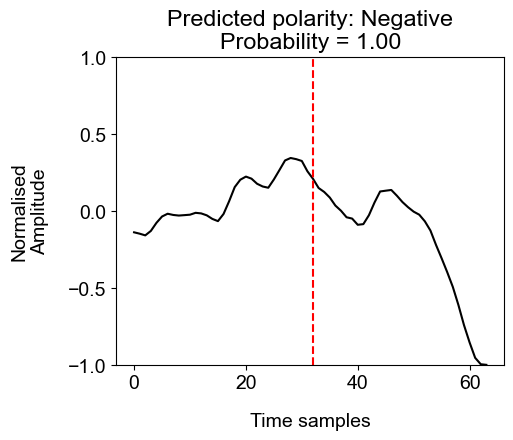

No (more) events detected till 2023-02-06T02:46:13.100000Z
1/1 [==============================] - 0s 213ms/step
Result:
P-arrival time = 2023-02-06T02:46:19.500000Z
S-arrival time = 2023-02-06T02:46:35.800000Z
Magnitude = 2.0999999046325684
Polarity = Negative (Probability = 0.992)


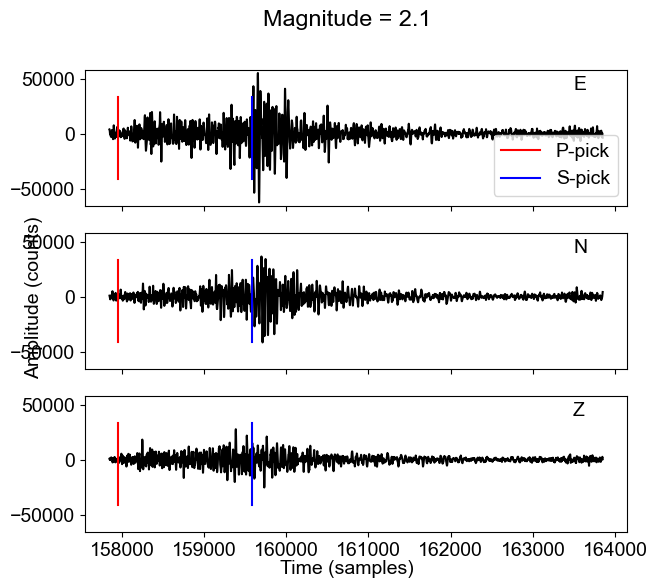

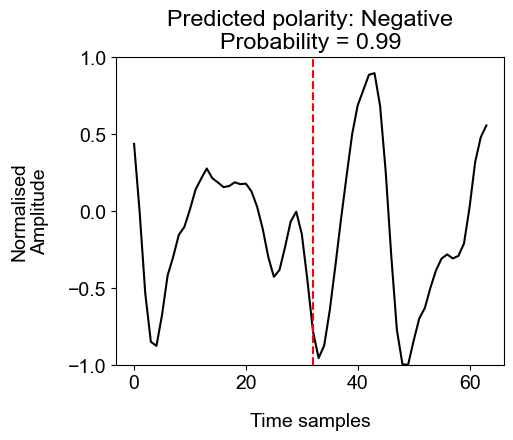

No (more) events detected till 2023-02-06T02:50:52.200000Z
1/1 [==============================] - 0s 331ms/step
Result:
P-arrival time = 2023-02-06T02:51:00.400000Z
S-arrival time = 2023-02-06T02:51:14.600000Z
Magnitude = 1.7999999523162842
Polarity = Positive (Probability = 1.000)


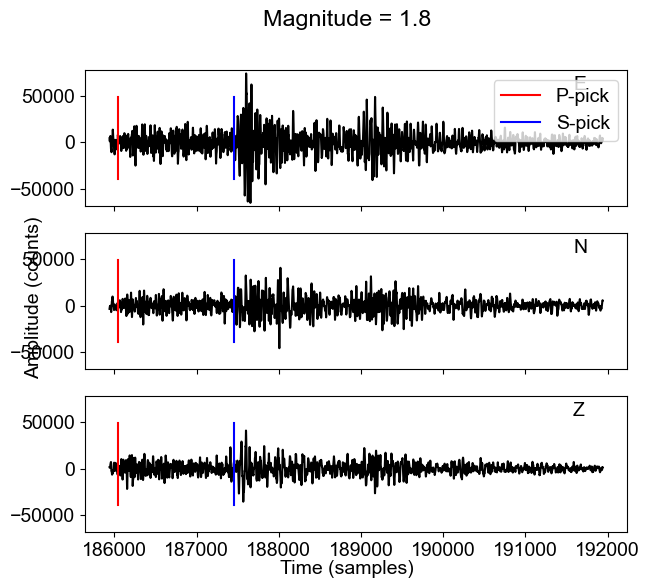

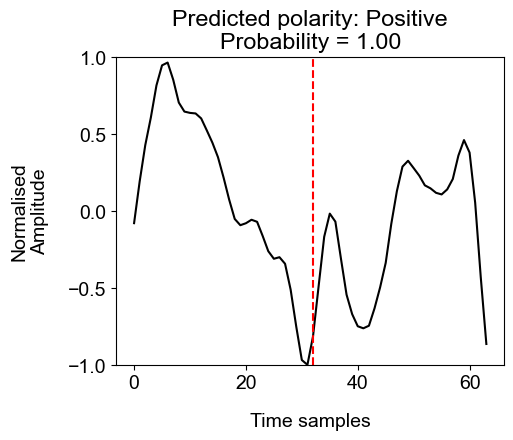

No (more) events detected till 2023-02-06T02:54:09.000000Z
1/1 [==============================] - 0s 309ms/step
Result:
P-arrival time = 2023-02-06T02:54:12.400000Z
S-arrival time = 2023-02-06T02:54:14.500000Z
Magnitude = 4.5
Polarity = Positive (Probability = 1.000)


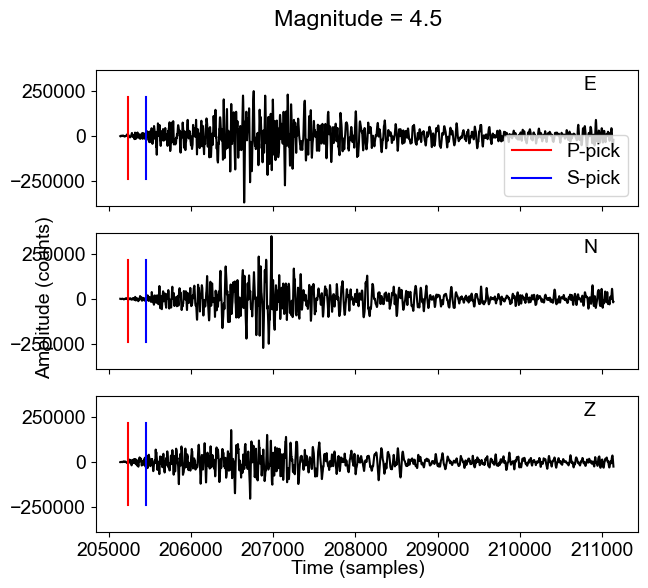

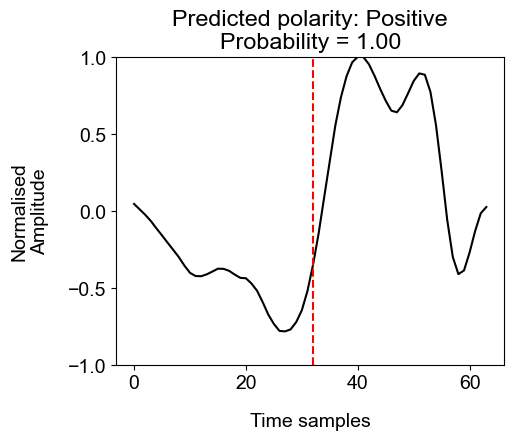

No (more) events detected till 2023-02-06T02:58:28.900000Z
No (more) events detected till 2023-02-06T02:58:29.400000Z
No (more) events detected till 2023-02-06T02:58:29.900000Z
No (more) events detected till 2023-02-06T02:58:30.200000Z
No (more) events detected till 2023-02-06T02:58:31.700000Z
No (more) events detected till 2023-02-06T02:58:32.000000Z
No (more) events detected till 2023-02-06T02:58:32.400000Z
1/1 [==============================] - 0s 483ms/step
Result:
P-arrival time = 2023-02-06T02:58:35.800000Z
S-arrival time = 2023-02-06T02:58:45.600000Z
Magnitude = 2.4000000953674316
Polarity = Positive (Probability = 0.999)


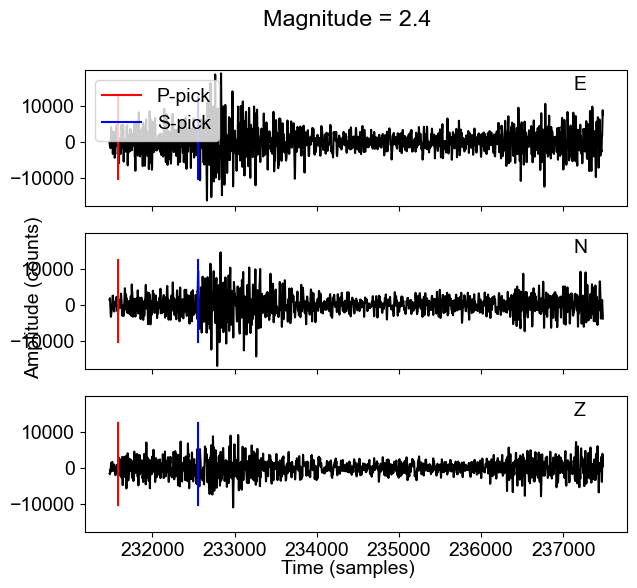

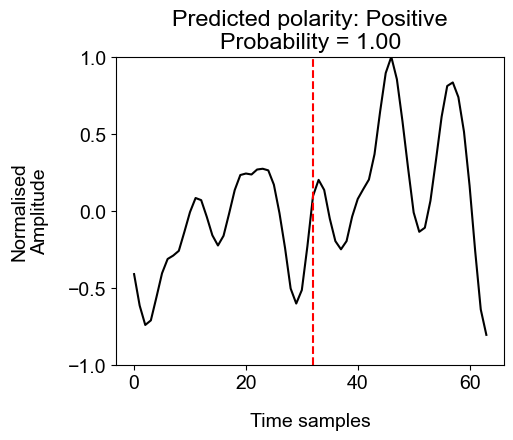

In [11]:
output_path = os.path.join(dirwork,'results/results_CEYT1_v1') # edit

results = monitor2("../Data_examples/Data_Turkey/CEYT1.mseed",
        device, leng_win=60, model_path=dirmodel, save_result=True, 
        path=output_path, file_name='results_CEYT1.csv')